<a href="https://colab.research.google.com/github/syedsajidhussain/UPES-MCA_DL/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 22:57:49 2023

@author: syedsajidhussain
"""

from matplotlib.pyplot import imshow


import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

np.random.seed(42)

SIZE=256
img_data=[]

img=cv2.imread('/content/drive/MyDrive/monalisa', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.1320 - accuracy: 0.3559
Epoch 2/200
1/1 [==============================] - 0s 17ms/step - loss: 0.0978 - accuracy: 0.3615
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0433 - accuracy: 0.3662
Epoch 4/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0295 - accuracy: 0.3671
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.4406
Epoch 6/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0163 - accuracy: 0.4010
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0160 - accuracy: 0.5058
Epoch 8/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0157 - accuracy: 0.4518
Epoch 9/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0167 - accuracy: 0.5481
Epoch 10/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0191 - accuracy: 0.2954
Epoch 11/200
1/1 [===

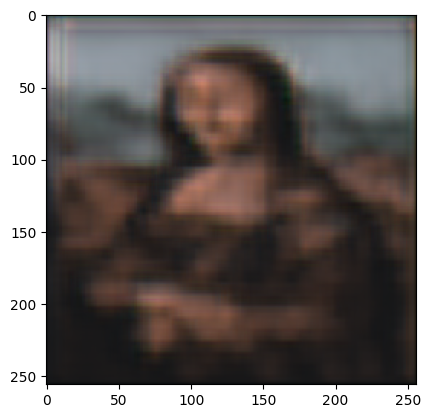

In [9]:
model.fit(img_array, img_array,
        epochs=200,
        shuffle=True)


print("Neural network output")
pred = model.predict(img_array)



imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

**Denoising Autoencoder**

11490434/11490434 [==============================] - 0s 0us/step


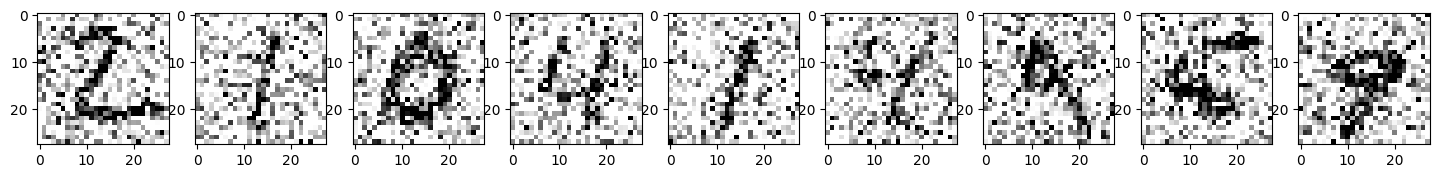

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 8)          

313/313 [==============================] - 1s 3ms/step


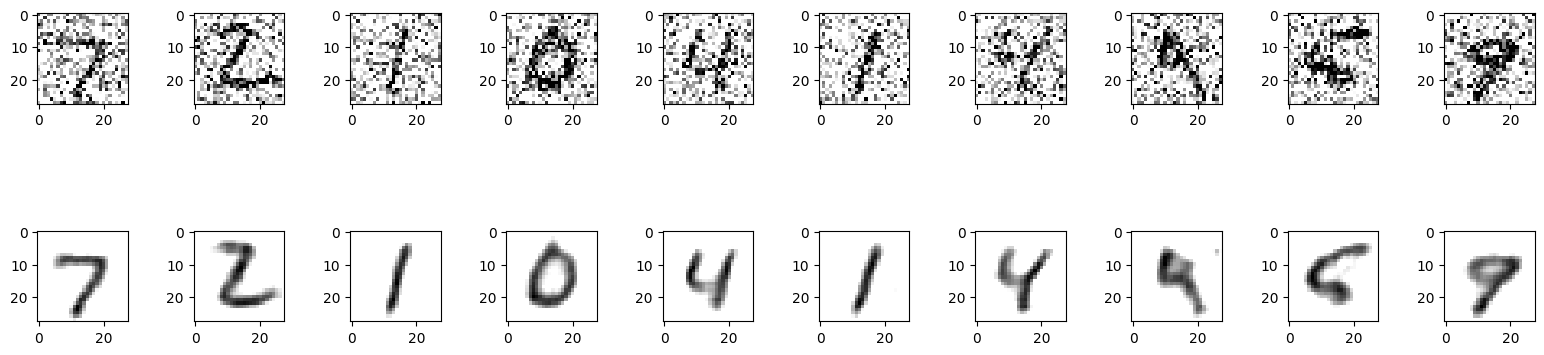

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy, x_test))



model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")

    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")